___

# GitHub commits activity analiysis
___

### Import the required libraries

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### create appropriate, auxiliary and convenient functions for our project

In [2]:
def get_owner_and_repoName(github_repo_link):
    """
    github_repo_link -> github repository url link
    return list consist of owner and repo
    
    example:
        github_repo_link = 'https://github.com/AsliddinTuxtasinov/like-netflix'
        owner = AsliddinTuxtasinov
        repo = like-netflix
    """
    link=github_repo_link.split('/')
    return link[3:]

In [3]:
def get_github_commits_api_url(owner, repo):
    """
    return github commits api path url
    
    owner -> github profile owner
    repo -> repositoy's name
    
        f"https://api.github.com/repos/{owner}/{repo}/commits"
    """
    return f"https://api.github.com/repos/{owner}/{repo}/commits"

In [4]:
def get_commiter_and_message(data, committer='committer', message='message'):
    """
    return dictionary
    
    data is list consist of dictionary.
    committer and message are the keys that we are loking for
    
    example:
        d = [{'author': {'name': 'Asliddin'},
              'committer': {'name': 'Asliddin','email': 'asliddin@gmail.com'},
              'message': '10-create ratings app.',
              'comment_count': 0
             }]
        res = get_commiter_and_message(data=d)
        print(res)
        ----------
        {0: {'name': 'Asliddin', 
             'email': 'asliddin@gmail.com', 
             'message': '10-create ratings app.'}}
    """
    dict = {}
    for i in range(len(data)):
        dict[i] = np.array(data)[i][committer]
        dict[i]['message'] = np.array(data)[i][message]
    return dict

### Get the Github profile owner and the repository name we need and use the github api url.

In [5]:
git_hub_repo_url = 'https://github.com/tiangolo/fastapi'
owner, repo = get_owner_and_repoName(github_repo_link=git_hub_repo_url)
url = get_github_commits_api_url(owner, repo)

### We convert the json data returned from the Github api to the Dataframe

In [6]:
data = pd.read_json(url)
data.head(2)

,sha,node_id,commit,url,html_url,comments_url,author,committer,parents
0,b93f8a709ab3923d1268dbc845f41985c0302b33,C_kwDOCZduT9oAKGI5M2Y4YTcwOWFiMzkyM2QxMjY4ZGJj...,"{'author': {'name': 'github-actions', 'email':...",https://api.github.com/repos/tiangolo/fastapi/...,https://github.com/tiangolo/fastapi/commit/b93...,https://api.github.com/repos/tiangolo/fastapi/...,None,None,[{'sha': '618c99d77444e383e7b95ebe32ededbd9515...
1,618c99d77444e383e7b95ebe32ededbd95155c43,C_kwDOCZduT9oAKDYxOGM5OWQ3NzQ0NGUzODNlN2I5NWVi...,"{'author': {'name': 'github-actions[bot]', 'em...",https://api.github.com/repos/tiangolo/fastapi/...,https://github.com/tiangolo/fastapi/commit/618...,https://api.github.com/repos/tiangolo/fastapi/...,"{'login': 'github-actions[bot]', 'id': 4189828...","{'login': 'web-flow', 'id': 19864447, 'node_id...",[{'sha': '291180bf2d8c39e84860c2426b1d58b6c80f...


### Let's look at the data in the columns `committer` and` commit` from the columns of our dataframe data.

In [7]:
data.columns

Index(['sha', 'node_id', 'commit', 'url', 'html_url', 'comments_url', 'author',
       'committer', 'parents'],
      dtype='object')

In [23]:
data['committer'][1]

{'login': 'web-flow',
 'id': 19864447,
 'node_id': 'MDQ6VXNlcjE5ODY0NDQ3',
 'avatar_url': 'https://avatars.githubusercontent.com/u/19864447?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/web-flow',
 'html_url': 'https://github.com/web-flow',
 'followers_url': 'https://api.github.com/users/web-flow/followers',
 'following_url': 'https://api.github.com/users/web-flow/following{/other_user}',
 'gists_url': 'https://api.github.com/users/web-flow/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/web-flow/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/web-flow/subscriptions',
 'organizations_url': 'https://api.github.com/users/web-flow/orgs',
 'repos_url': 'https://api.github.com/users/web-flow/repos',
 'events_url': 'https://api.github.com/users/web-flow/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/web-flow/received_events',
 'type': 'User',
 'site_admin': False}

In [24]:
data['commit'][0]

{'author': {'name': 'github-actions',
  'email': 'github-actions@github.com',
  'date': '2022-02-01T14:28:16Z'},
 'committer': {'name': 'github-actions',
  'email': 'github-actions@github.com',
  'date': '2022-02-01T14:28:16Z',
  'message': '📝 Update release notes'},
 'message': '📝 Update release notes',
 'tree': {'sha': '23b03220ff0211104c30b02c1b4bd05f930b567e',
  'url': 'https://api.github.com/repos/tiangolo/fastapi/git/trees/23b03220ff0211104c30b02c1b4bd05f930b567e'},
 'url': 'https://api.github.com/repos/tiangolo/fastapi/git/commits/b93f8a709ab3923d1268dbc845f41985c0302b33',
 'comment_count': 0,
 'verification': {'verified': False,
  'reason': 'unsigned',
  'signature': None,
  'payload': None}}

### So, based on the above, we need the data in the `commit` column, from the data in this column we can extract the data corresponding to our project.

In [25]:
new_data = data['commit']
new_dict_data = get_commiter_and_message(data=new_data)

new_dict_data

{0: {'name': 'github-actions',
  'email': 'github-actions@github.com',
  'date': '2022-02-01T14:28:16Z',
  'message': '📝 Update release notes'},
 1: {'name': 'GitHub',
  'email': 'noreply@github.com',
  'date': '2022-02-01T14:27:34Z',
  'message': '👥 Update FastAPI People (#4502)\n\nCo-authored-by: github-actions <github-actions@github.com>'},
 2: {'name': 'Sebastián Ramírez',
  'email': 'tiangolo@gmail.com',
  'date': '2022-01-23T22:38:51Z',
  'message': '🔖 Release version 0.73.0'},
 3: {'name': 'Sebastián Ramírez',
  'email': 'tiangolo@gmail.com',
  'date': '2022-01-23T22:37:48Z',
  'message': '📝 Update release notes'},
 4: {'name': 'github-actions',
  'email': 'github-actions@github.com',
  'date': '2022-01-23T22:14:28Z',
  'message': '📝 Update release notes'},
 5: {'name': 'GitHub',
  'email': 'noreply@github.com',
  'date': '2022-01-23T22:13:55Z',
  'message': '🐛 Fix bug preventing to use OpenAPI when using tuples (#3874)\n\nCo-authored-by: Sebastián Ramírez <tiangolo@gmail.com>'}

### Transfer the extracted data to Dataframe

In [26]:
df = pd.DataFrame(new_dict_data.values())
df

,name,email,date,message
0,github-actions,github-actions@github.com,2022-02-01T14:28:16Z,📝 Update release notes
1,GitHub,noreply@github.com,2022-02-01T14:27:34Z,👥 Update FastAPI People (#4502)\n\nCo-authored...
2,Sebastián Ramírez,tiangolo@gmail.com,2022-01-23T22:38:51Z,🔖 Release version 0.73.0
3,Sebastián Ramírez,tiangolo@gmail.com,2022-01-23T22:37:48Z,📝 Update release notes
4,github-actions,github-actions@github.com,2022-01-23T22:14:28Z,📝 Update release notes
5,GitHub,noreply@github.com,2022-01-23T22:13:55Z,🐛 Fix bug preventing to use OpenAPI when using...
6,github-actions,github-actions@github.com,2022-01-23T21:31:08Z,📝 Update release notes
7,GitHub,noreply@github.com,2022-01-23T21:30:35Z,📝 Tweak and improve docs for Request Files (#4...
8,github-actions,github-actions@github.com,2022-01-23T19:14:47Z,📝 Update release notes
9,GitHub,noreply@github.com,2022-01-23T19:14:13Z,✨ Add support for declaring `UploadFile` param...


### Let's start working with the data of df dataframe, the `date` column of df is wrong format, not` datetime` type, which can cause us problems later. Let's change it to `datetime` type

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     30 non-null     object
 1   email    30 non-null     object
 2   date     30 non-null     object
 3   message  30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [28]:
type(df.date[0])

str

In [30]:
df['date'] = pd.to_datetime(arg=df['date'], format="%Y-%m-%d").dt.date
df

,name,email,date,message
0,github-actions,github-actions@github.com,2022-02-01,📝 Update release notes
1,GitHub,noreply@github.com,2022-02-01,👥 Update FastAPI People (#4502)\n\nCo-authored...
2,Sebastián Ramírez,tiangolo@gmail.com,2022-01-23,🔖 Release version 0.73.0
3,Sebastián Ramírez,tiangolo@gmail.com,2022-01-23,📝 Update release notes
4,github-actions,github-actions@github.com,2022-01-23,📝 Update release notes
5,GitHub,noreply@github.com,2022-01-23,🐛 Fix bug preventing to use OpenAPI when using...
6,github-actions,github-actions@github.com,2022-01-23,📝 Update release notes
7,GitHub,noreply@github.com,2022-01-23,📝 Tweak and improve docs for Request Files (#4...
8,github-actions,github-actions@github.com,2022-01-23,📝 Update release notes
9,GitHub,noreply@github.com,2022-01-23,✨ Add support for declaring `UploadFile` param...


In [31]:
df.message[0]

'📝 Update release notes'

### Sort by `name` column in the  df

In [32]:
df.sort_values(by=['name'], inplace=True)
df.head()

,name,email,date,message
14,GitHub,noreply@github.com,2022-01-23,🐛 Prefer custom encoder over defaults if speci...
16,GitHub,noreply@github.com,2022-01-23,🐛 Prefer custom encoder over defaults if speci...
22,GitHub,noreply@github.com,2022-01-23,🔧 Add sponsor Dropbase (#4465)
28,GitHub,noreply@github.com,2022-01-16,🌐 Fix Korean translation for `docs/ko/docs/ind...
11,GitHub,noreply@github.com,2022-01-23,✨ Add support for tags with Enums (#4468)


### From Df we extract the necessary data to the analytical part of our project

In [34]:
count_commits = df[['name', 'date']]
count_commits = count_commits.value_counts().unstack().transpose().fillna(0)
count_commits

name,GitHub,Sebastián Ramírez,github-actions
date,,,
2022-01-16,2.0,2.0,3.0
2022-01-23,9.0,3.0,9.0
2022-02-01,1.0,0.0,1.0


### `Relationship between time and the number of commits` The heatmap displaying the change in the number of commits while dark colored ones shift to maximum, and bright colored ones shift to minimum quantity

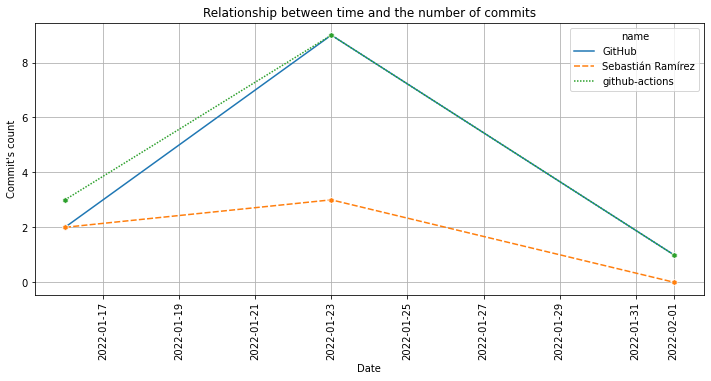

In [41]:
plt.figure(figsize=(12,5))
sns.lineplot(data=count_commits, marker='h')
plt.xticks(rotation=90)
plt.title("Relationship between time and the number of commits")
plt.xlabel("Date")
plt.ylabel("Commit's count")
plt.grid()
plt.show()

### `Relationship between time and the number of commits` The heatmap displaying the change in the number of commits while dark colored ones shift to maximum, and bright colored ones shift to minimum quantity

In [43]:
df_heatmap = count_commits.transpose()
df_heatmap

date,2022-01-16,2022-01-23,2022-02-01
name,,,
GitHub,2.0,9.0,1.0
Sebastián Ramírez,2.0,3.0,0.0
github-actions,3.0,9.0,1.0


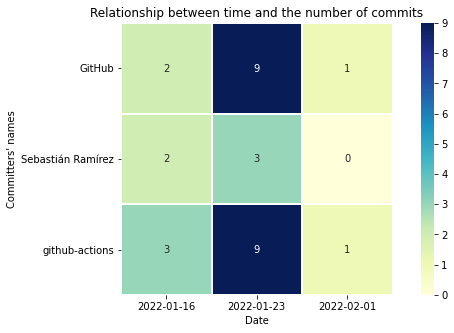

In [44]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=df_heatmap, cmap="YlGnBu", linewidths=1, square=True, annot=True)
plt.title("Relationship between time and the number of commits")
plt.xlabel("Date")
plt.ylabel("Committers' names")
plt.show()

___

## great job